<a href="https://colab.research.google.com/github/Mayankjain0807/Stock_price_prediction_yes_bank/blob/Yes_bank_price_prediction/Project_Yes_bank_ML_Submission_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Yes Bank stock prediction**



## **Project Type**    - EDA/Regression/Classification/Unsupervised
## **Contribution**    - Individual
## **Name**            - **Mayank Jain**


# **Project Summary -**

#### Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# **GitHub Link -**

https://github.com/Mayankjain0807/Stock_price_prediction_yes_bank

# **Problem Statement**


### Indian stock market is a very volatile market. All stocks which are listed in our sensex and nifty 50 depend on various factors like economy, GDP, etc. We choose one stock from banking sector i.e “Yes bank”. Now the challenge is to predict the closing price of this stock in this volatile market. Although predicting the stock price is very tough as any irregularity in the real market can fail our predictions hence we need many years of data to understand such irregularities. The same irregularity and the financial crisis occurred with that stock in 2018, from then the stock totally broke down from its higher price. Here we collect the data of last 16 years to predict the prices of that stock in near future.



# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import io
import numpy as np
import pandas as pd
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import seaborn as sns
import matplotlib.pyplot as plt


### Dataset Loading

In [2]:
# Load Dataset

from google.colab import files
stock_data = files.upload()

Saving data_YesBank_StockPrices.csv to data_YesBank_StockPrices.csv


### Dataset First View

In [3]:
# Dataset First Look
data = pd.read_csv(io.BytesIO(stock_data['data_YesBank_StockPrices.csv']))
data.head(10)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71
6,Jan-06,13.68,17.16,13.58,15.33
7,Feb-06,15.50,16.97,15.40,16.12
8,Mar-06,16.20,20.95,16.02,20.08
9,Apr-06,20.56,20.80,18.02,19.49


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
data.shape

(185, 5)

### Dataset Information

In [5]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
data[data.duplicated()]   #There is no duplocate values in data

,Date,Open,High,Low,Close


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

<Axes: >

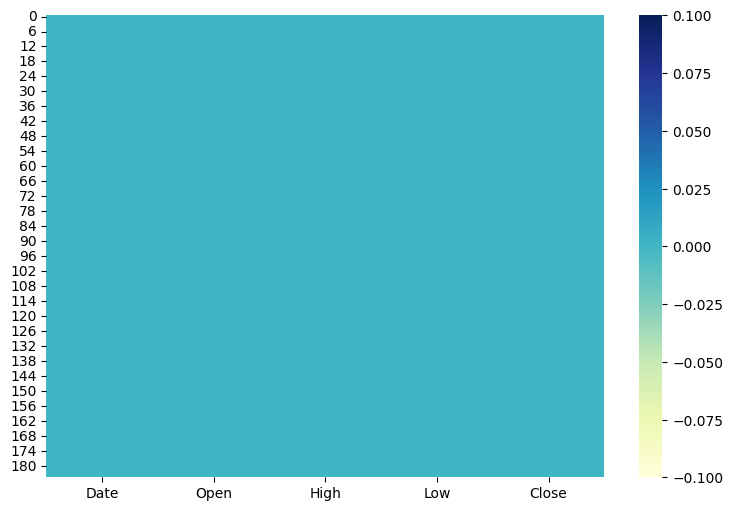

In [8]:
# Visualizing the missing values

plt.figure(figsize=(9,6))
sns.heatmap(data.isnull(),cmap="YlGnBu",cbar={'label': 'Missing Data'})


# There is no null values in the dataset as we can clearly seen in the graph.

### What did you know about your dataset?

**The above dataset has 185 rows and 5 columns.  There is no duplicate as well as no missing values in the dataset.**

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [10]:
# Dataset Describe
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

**1- Date**- Date of Record

**2-Open**- Opening Price

**3- High** - Highest price in the day

**4-Low** - Lowest price in the day

**5-Close**- Occupations of the speaker

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
conv_to_list = data.columns.tolist()
print (conv_to_list)
for x in conv_to_list:
  print("No. of unique values in ",x,"is",data[x].nunique())

['Date', 'Open', 'High', 'Low', 'Close']
No. of unique values in  Date is 185
No. of unique values in  Open is 183
No. of unique values in  High is 184
No. of unique values in  Low is 183
No. of unique values in  Close is 185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
# Make a copy of our dataset

df = data.copy()
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [13]:
#Here we convert the string date type into datetime type by using the datetime.strptime

df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

df['Date']


0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Chart - 1 - FREQUENCY DISTRIBUTION CURVE**

Text(0.5, 1.0, 'Closing price frequency')

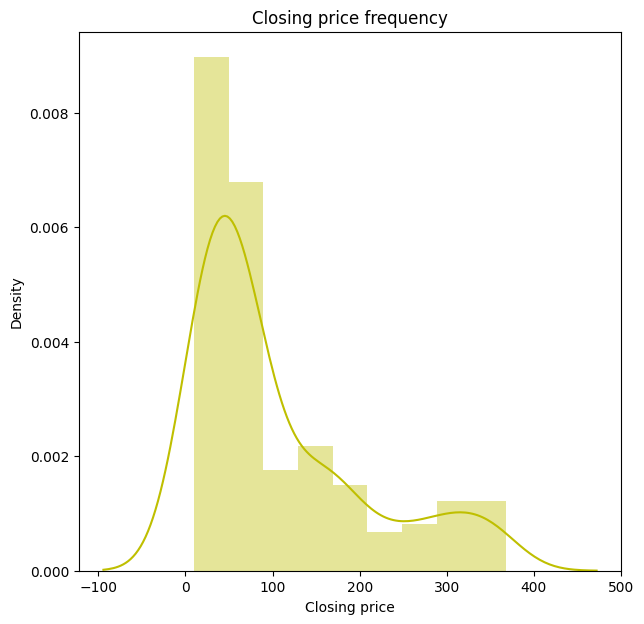

In [14]:
# Chart - 1 visualization code
# Here we plot the frequency distribution of Dependent variable 'close'

plt.figure(figsize=(7,7))
sns.distplot(data['Close'],color="y")
plt.xlabel("Closing price")
plt.title("Closing price frequency")

##### 1. Why did you pick the specific chart?

We pick this chart to see the frequency distribution of closing price since 2005.

##### 2. What is/are the insight(s) found from the chart?

With the help of this chart we can conclude that , the closing price of **yes bank** is lie in between 10 to 90 Rps most of the times.

# **Chart - 2- LINE GRAPH**

In [15]:
# Chart - 2
# Here we plot the line graph between year and closing price.

import plotly.express as px
fig = px.line(df, df['Date'], df['Close'], title='Monthly closing price')
fig.update_layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Closing price'),
    autosize=False,
    width=1400,
    height=400)

fig.show()


### 1. **Why did you pick the specific chart?**

To check the growth of stock over the period of time

# **Chart - 3 - Frequenct distribution histogram graph of each column.**

In [16]:
# Store all the numeric columns in one variable

numeric_col = df.describe().columns
numeric_col

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

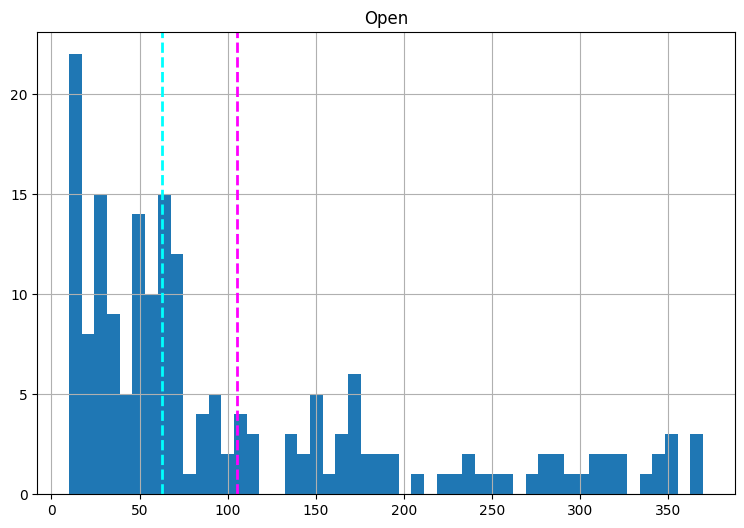

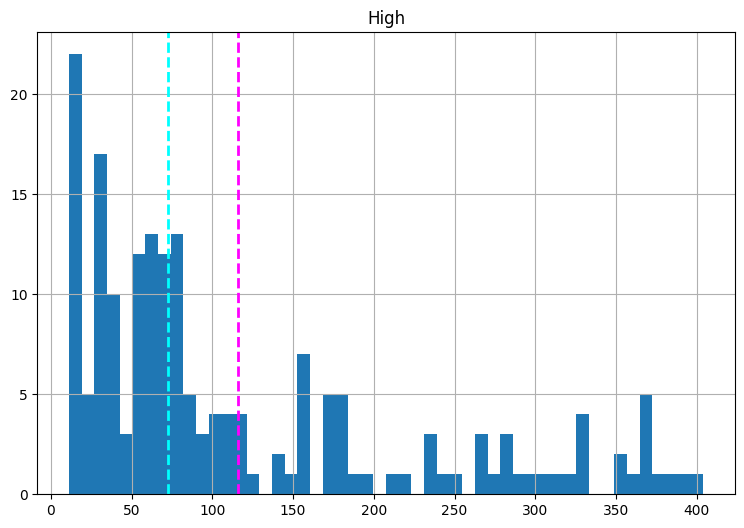

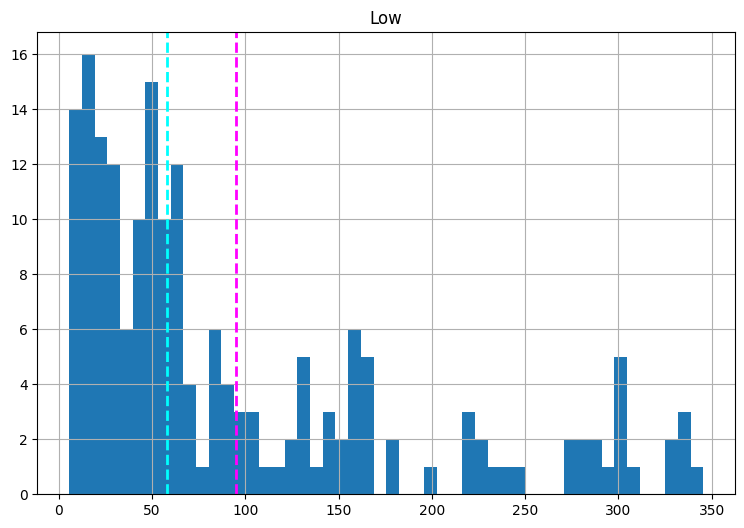

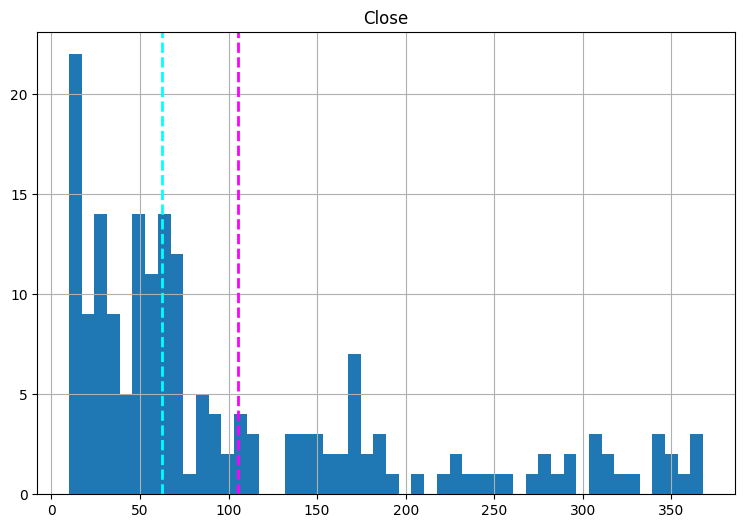

In [17]:
# Chart - 3 Frequenct distribution histogram graph of each column.

for col in numeric_col[0:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

### 1. **Why did you pick the specific chart?**

## To check the skewness of the dataset.

### **2. What is/are the insight(s) found from the chart?**

### We found that, all columns in our dataset are **Right skewed**.

 # **Chart - 4- SCATTER PLOT BETWEEN DEPENDENT VARIABLE AND INDEPENDENT VARIABLE**

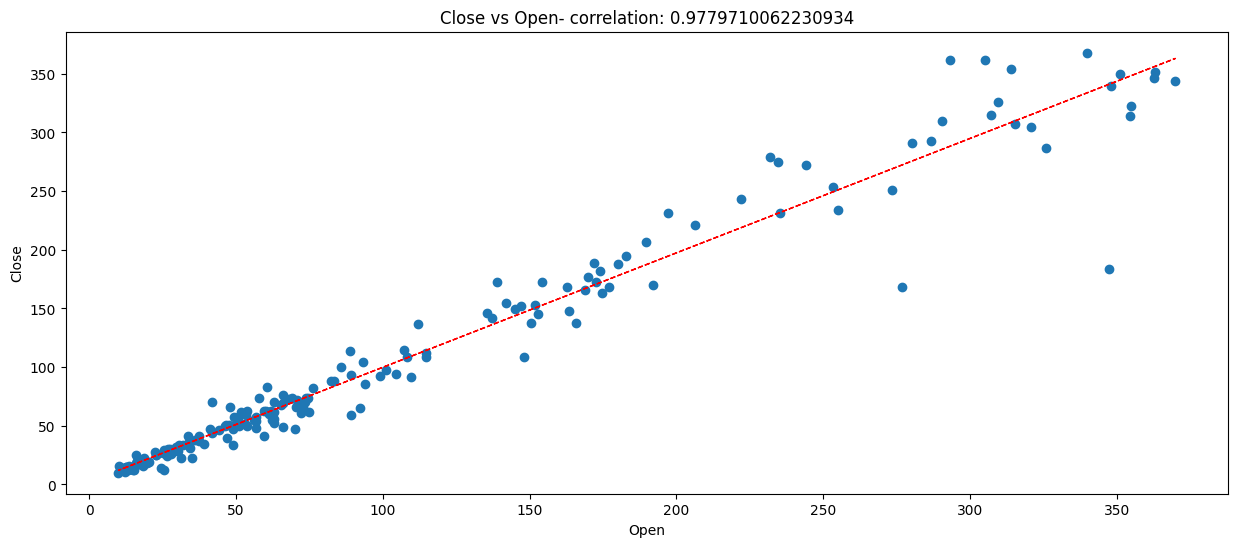

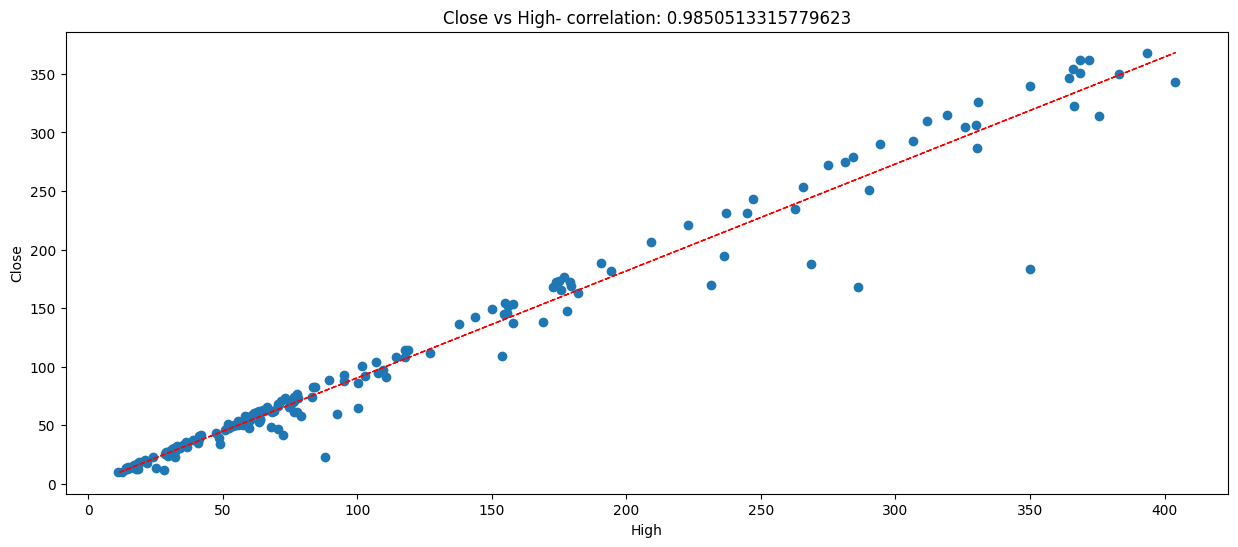

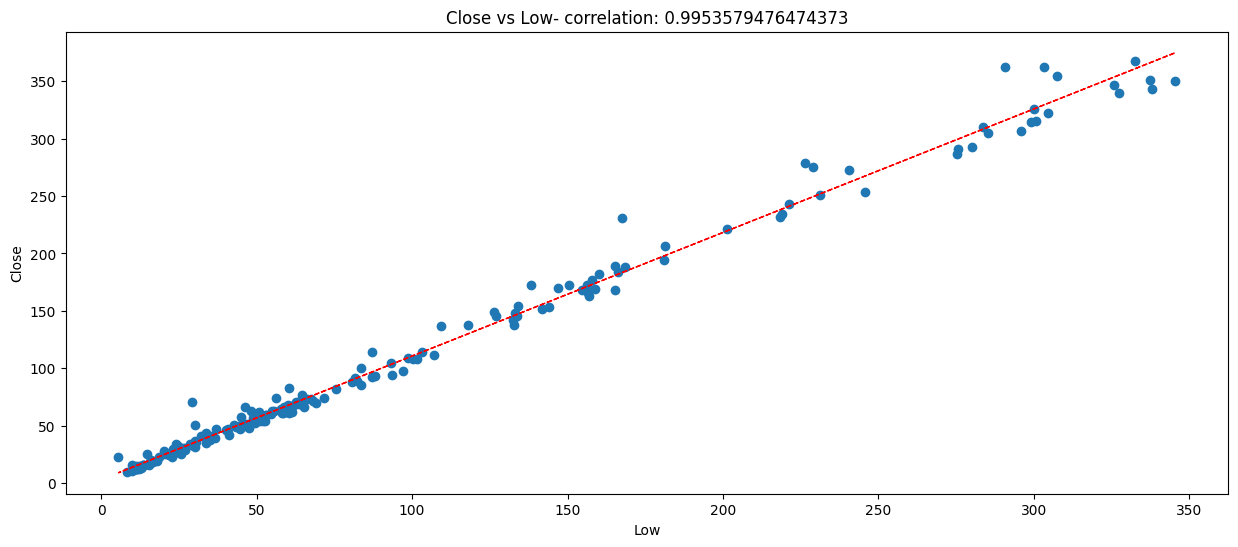

In [18]:
# Chart - 4 visualization code
# Co-relation between dependent variable and independent variable

for col in numeric_col[0:-1]:
    fig = plt.figure(figsize=(15,6))
    ax = fig.gca()
    feature = df[col]
    label = df['Close']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Close')
    ax.set_title('Close vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Close'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

### **1. Why did you pick the specific chart?**

### This scatter chart shows clearly the co-relation between independent variable & dependent variable. All "X" variable are highly co-related with the 'Y' variable.

### **2. What is/are the insight(s) found from the chart?**

### With the help of this graph, we find that all independent variable are highly co-related with the dependent variable. so, Instead of using all x variable we can use 'Mean' of all 3 X's variable.
### Will see the relation between Mean and Y- variable in coming charts.

# **Chart - 5 -  HEAT MAP FOR COORELATION BETWEEN THE COLUMNS**

<Axes: title={'center': 'Correlation Heatmap'}>

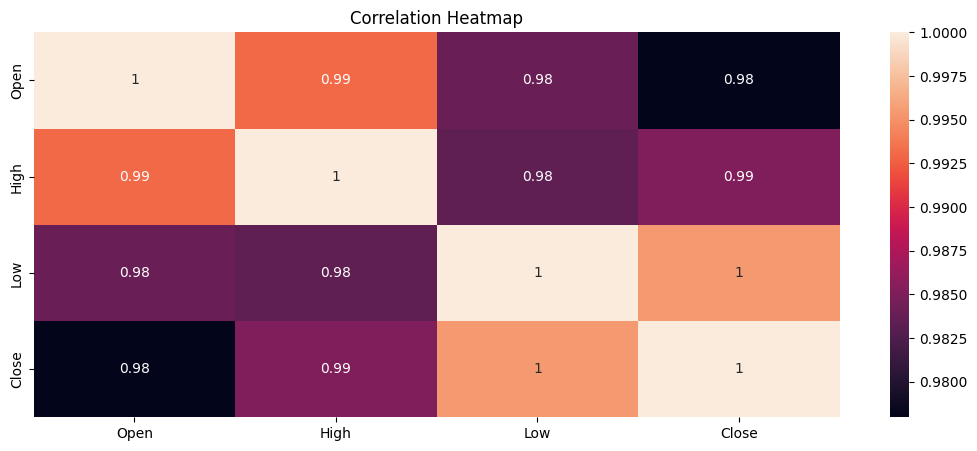

In [19]:
# Chart - 5 Correlation Heatmap visualization code
plt.figure(figsize=(13,5))
corr= df.corr()
plt.title('Correlation Heatmap')
sns.heatmap(corr, annot=True)

### **1. Why did you pick the specific chart?**

### This chart was chosen to check the correlation between all numerical variables with each other. The heatmap allows graphical representation of the correlation between different columns.

### **2. What is/are the insight(s) found from the chart?**

### All X variables are nearly 100% correlated.
###If there are highly correlated X variables,then

### Either we skip two of them x variable in our linear regression model so that model is less complex

##OR

### We can generate a new variable which is logically true with the behaiour of all co-related x- variable

# **Chart - 6 MULTIVARIATE - Pair Plot**

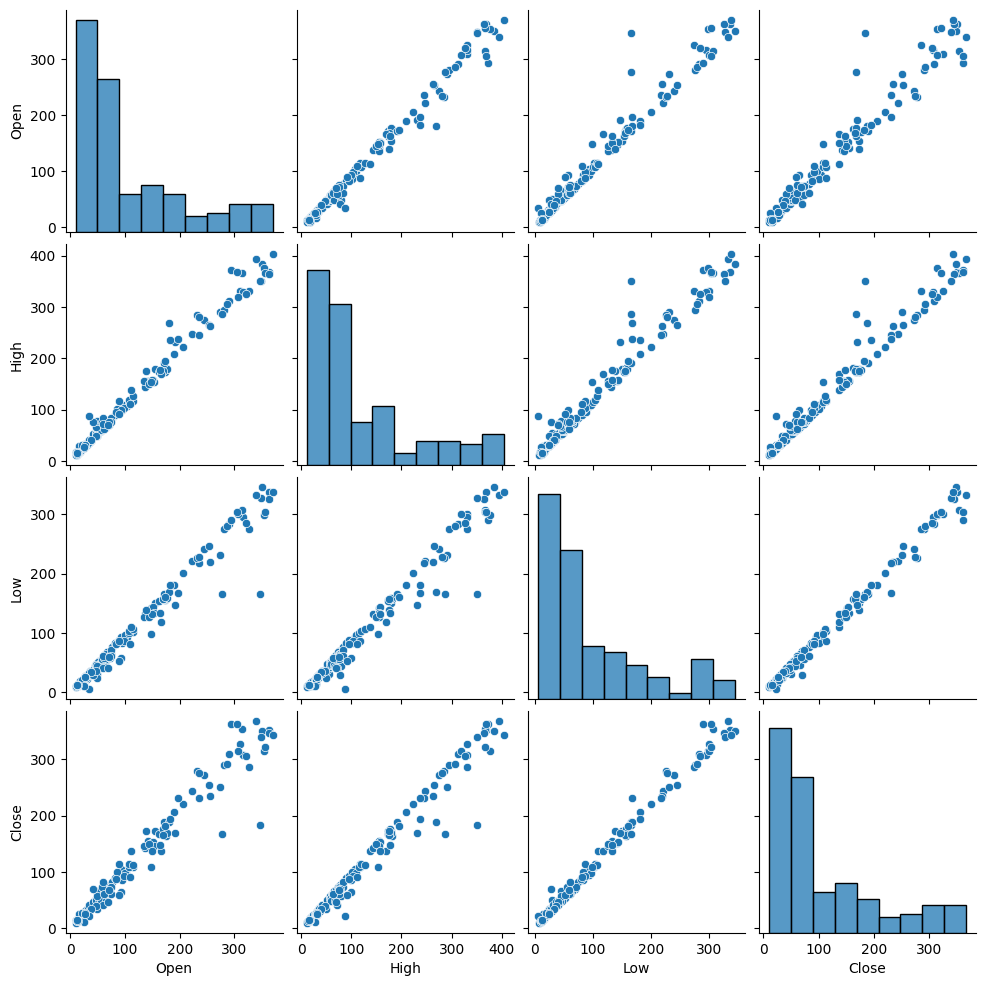

In [20]:
# Chart - 8 Pair plot visualization code

sns.pairplot(df)

### **1. Why did you pick the specific chart?**

### It is a distribution plot to show the marginal distribution of the data in each column. Hence this chart can show link between all columns with each other at a single line code.

### **2. What is/are the insight(s) found from the chart?**

### The pair plots showed that each column are co-related with other columns.



  .

# ***6. Feature Engineering & Data Pre-processing***

# **1. Handling Missing Values**

In [21]:
# Handling Missing Values & Missing Value Imputation
data.isnull().sum()

# There is no missing values in our dataset. If we have a misisng value in our numerical dataset
# then we fill that null values with the mean value of that column by the fillna method.

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

# **2. Outliers**

Text(0.5, 1.0, 'Box plot between Mean variable')

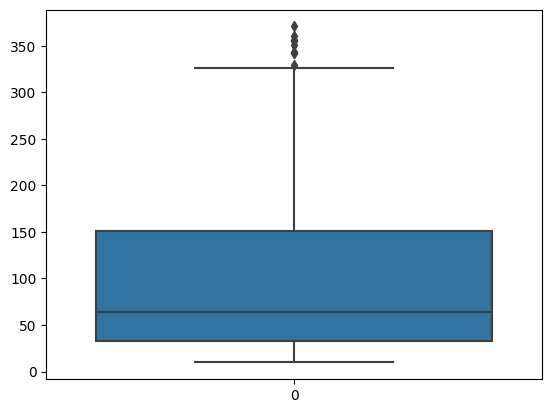

In [61]:
# Here we plot the box plot to find the outliers variable.

sns.boxplot(df['Mean'])


In [68]:
# Here we find out the value of upper band above which the outliers lie.
Q1 = df['Mean'].quantile(0.25)
Q3 = df['Mean'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
print("Upper band :", upper)

Upper band : 328.46500000000003


In [78]:
# Here we calculate, how many values are above the upper band.

d = df['Mean'] >= 328
d.value_counts()

# we find only 9 values are ablove the upper band out of the 176, so we do not need to remove the otliers.

False    176
True       9
Name: Mean, dtype: int64

# **3. Feature Manipulation & Selection**

## 1. Feature Manipulation

### To minimize the  complexity of model, we generate a new column called 'Mean', which is a true behaviour of all three independent X-variable.

In [22]:
# Manipulate Features to minimize feature correlation and create new features

df['Mean'] =  df[['Open', 'High', 'Low']].mean(axis=1).round(2)
df.head()

,Date,Open,High,Low,Close,Mean
0,2005-07-01,13.00,14.00,11.25,12.46,12.75
1,2005-08-01,12.58,14.88,12.55,13.42,13.34
2,2005-09-01,13.48,14.87,12.27,13.30,13.54
3,2005-10-01,13.20,14.47,12.40,12.99,13.36
4,2005-11-01,13.35,13.88,12.88,13.41,13.37


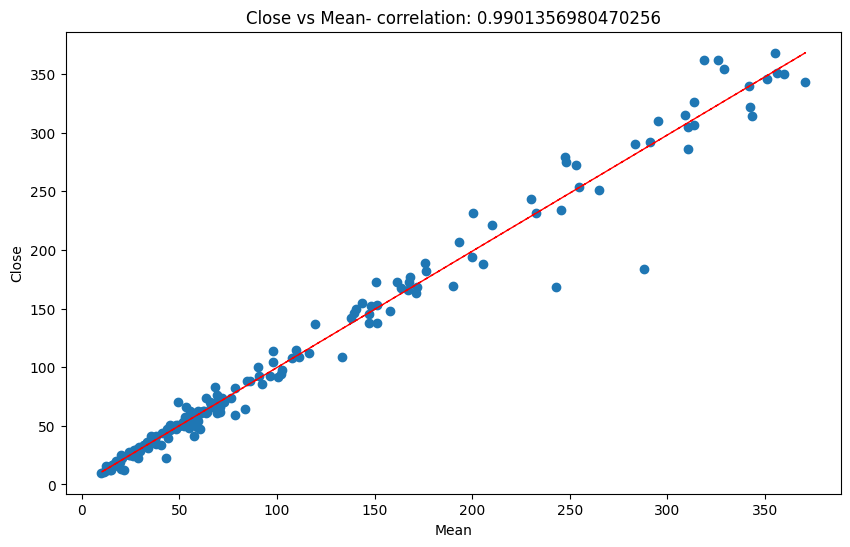

In [23]:
# Check the co-relation between new x-variable and y-variable

fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
feature = df['Mean']
label = df['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Mean')
plt.ylabel('Close')
ax.set_title('Close vs ' + 'Mean' + '- correlation: ' + str(correlation))
z = np.polyfit(df['Mean'], df['Close'], 1)
y_hat = np.poly1d(z)(df['Mean'])

plt.plot(df['Mean'], y_hat, "r--", lw=1)

plt.show()

In [24]:
# Here we check the multicollinearity of variables by Vif factor. We can remove the x-varible if the vif vlaue is greater than 10

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


    return(vif)

In [25]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Close']]])

,variables,VIF
0,Open,3.341513e+08
1,High,3.960374e+08
2,Low,2.770140e+08
3,Mean,2.993352e+09


### All vif values are under 10 so all are corelated with our dependent variable. But as we seen before all are highly co-related with each other so to remove the complexity of model , we can use only 1 x-varibale i.e Mean which have the behaviour of all x variable.

## 2. Feature Selection

In [26]:
# Select your features wisely to avoid overfitting

y = df.dropna().Close
X = df.dropna().drop(['Date','Close','Open','High','Low'], axis=1)


# **4. Data Splitting**

In [27]:
# Split your data to train and test. Choose Splitting ratio wisely.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)



# What data splitting ratio have you used and why?

### We split the data 80 by 20 in ratio terms. 80% Train data and 20% Test data
### splitted in random state.

### **Normalization** the x-variable data by using MinMaxScaler technique. By using this technique, we are converting all numerical values in between 0 to 1.

In [28]:
# Normalize the independent x variable of the dataset.

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## ***7. ML Model Implementation***

# ML Model - 1  **Linear Regression**

In [29]:
# ML Model - 1 Implementation
regressor = LinearRegression()

# Fit the Algorithm
regressor.fit(X_train, y_train)

# Predict on the model
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)




## Evaluation of **Mean squared value, Root mean squared value, R-square value and Mean absolute percentage error of linear regression**

In [30]:
# Evaluation of Mean squared value, Root mean squared value, R-square value and Mean absolute percentage error of linear regression model

#mean_squared_error
L_MSE  = mean_squared_error(y_test, y_pred_test)

print("MSE :" , L_MSE)

# root mean_squared_error
L_RMSE = np.sqrt(L_MSE)
print("RMSE :" ,L_RMSE)

# R- square
L_r2 = r2_score(y_test , y_pred_test)
print("R2 :" ,L_r2)

# mean_absolute_percentage_error
L_mapr = mean_absolute_percentage_error(y_test, y_pred_test)
print(L_mapr)

MSE : 232.50877546732764
RMSE : 15.248238438171395
R2 : 0.9798661099034024
0.07679921843466926


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

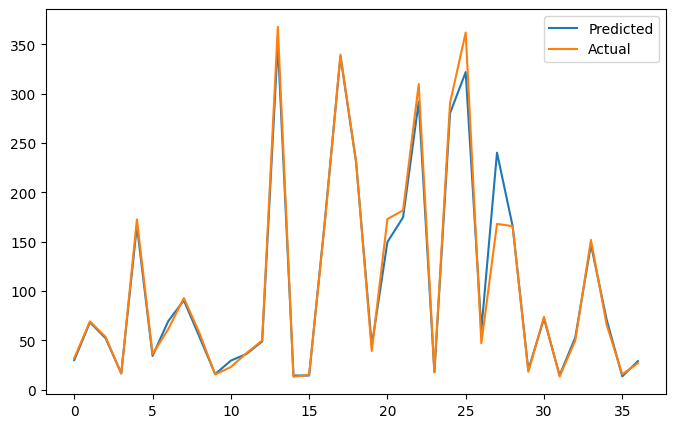

In [31]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(8,5))
plt.plot((y_pred_test))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()


Text(0, 0.5, 'y_pred_test')

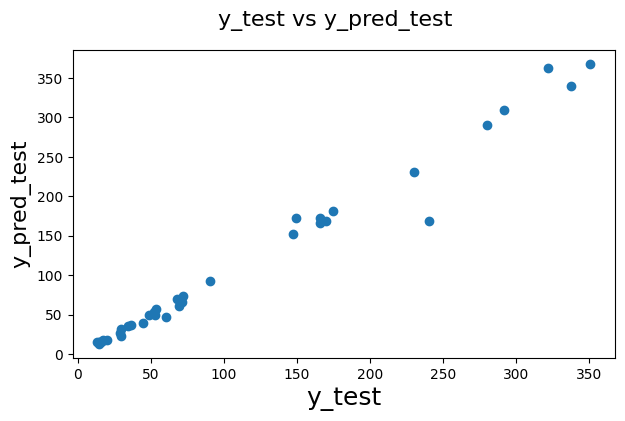

In [32]:
# Check for homoscadacity of linear regression

fig = plt.figure(figsize=(7,4))
plt.scatter(y_pred_test, y_test)
fig.suptitle('y_test vs y_pred_test', fontsize = 16)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_test', fontsize = 16)

# ML Model - 2- **Lasso and Ridge regression model**

##Lasso Regression

In [33]:
# ML Model - 3 Implementation
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

# Fit the Algorithm
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

# Predict on the model
y_pred_lr = lasso.predict(X_test)

## Evaluation of **Mean squared value, Root mean squared value, R-square value and Mean absolute percentage error of Lasso regression**

In [34]:
# Here we evaluate the mse, rmse, r2, mapr of lasso regression model

# mean_squared_error
MSE  = mean_squared_error((y_test), (y_pred_lr))

print("MSE :" , MSE)

print('-------')

# root mean_squared_error
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

print('-------')

# R-square
r2 = r2_score((y_test), (y_pred_lr))
print("R2 :" ,r2)

print('-------')

# mean_absolute_percentage_error
mapr = round(mean_absolute_percentage_error(y_test, y_pred_lr),2)
print("mapr:", mapr)

MSE : 232.5114038581741
-------
RMSE : 15.248324624632508
-------
R2 : 0.9798658823002406
-------
mapr: 0.08


#Ridge Regression

In [35]:
ridge  = Ridge(alpha=0.001 , max_iter= 3000)

# Fit the Algorithm
ridge.fit(X_train, y_train)
ridge.score(X_train, y_train)

# Predict on the model
y_pred_rr = ridge.predict(X_test)


## Evaluation of **Mean squared value, Root mean squared value, R-square value and Mean absolute percentage error of Ridge regression**

In [36]:
# Here we evaluate the mse, rmse, r2, mapr of ridge regression model

# mean_squared_error
MSE  = mean_squared_error((y_test), (y_pred_rr))
print("MSE :" , MSE)

print('-------')

# root mean_squared_error
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

print('-------')

# R-square
r2 = r2_score((y_test), (y_pred_rr))

print("R2 :" ,r2)

print('-------')

# mean_absolute_percentage_error
mapr = round(mean_absolute_percentage_error(y_test, y_pred_rr),2)
print("mapr:", mapr)

MSE : 232.5719924394473
-------
RMSE : 15.250311224347106
-------
R2 : 0.9798606356860687
-------
mapr: 0.08


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Text(0, 0.5, 'y_pred_lr')

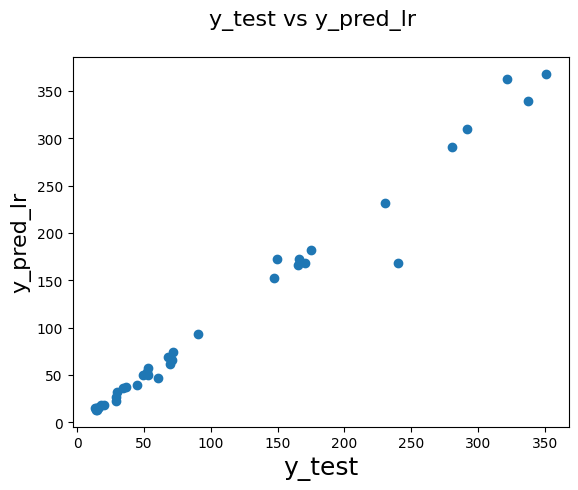

In [37]:
# Check for homoscadacity of lasso regression

fig = plt.figure()
plt.scatter(y_pred_lr, y_test)
fig.suptitle('y_test vs y_pred_lr', fontsize = 16)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_lr', fontsize = 16)

Text(0, 0.5, 'y_pred_rr')

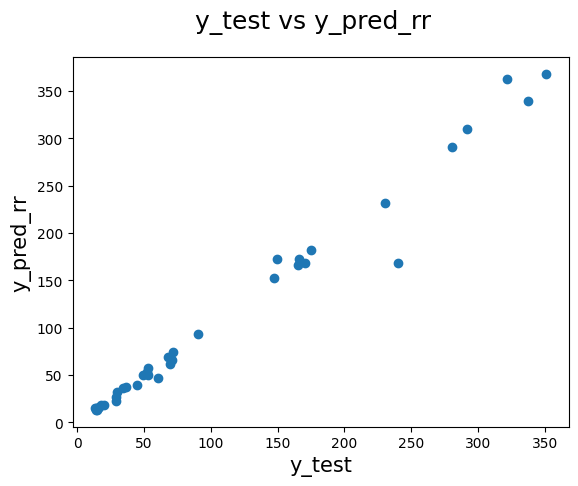

In [38]:
# Visualizing evaluation Metric Score chart
# Check for homoscadacity of ridge regression

fig = plt.figure()
plt.scatter(y_pred_rr, y_test)
fig.suptitle('y_test vs y_pred_rr', fontsize = 18)              # Plot heading
plt.xlabel('y_test', fontsize = 15)                          # X-label
plt.ylabel('y_pred_rr', fontsize = 15)


#### 2. Cross- Validation & Hyperparameter Tuning

#Lasso cross validation

In [39]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)


# Fit the Algorithm
lasso_regressor.fit(X_train, y_train)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

# Predict on the model
y_pred_lasso = lasso_regressor.predict(X_test)


The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -185.56929798652635


## Evaluation of **Mean squared value, Root mean squared value, R-square value and Mean absolute percentage error of Lasso cross validation**

In [40]:
# Here we evaluate the mse, rmse, r2, mapr of lasso  cv model

# mean_squared_error
l_MSE  = mean_squared_error((y_test), (y_pred_lasso))
print("MSE :" , l_MSE)

# Root mean_squared_error
l_RMSE = np.sqrt(l_MSE)
print("RMSE :" ,l_RMSE)

# R-square
l_r2 = r2_score((y_test), (y_pred_lasso))
print("R2 :" ,l_r2)

# Mean absolute percentage error
l_mapr = round(mean_absolute_percentage_error(y_test, y_pred_lasso),2)
print("mapr:", l_mapr)

MSE : 232.50877546732764
RMSE : 15.248238438171395
R2 : 0.9798661099034024
mapr: 0.08


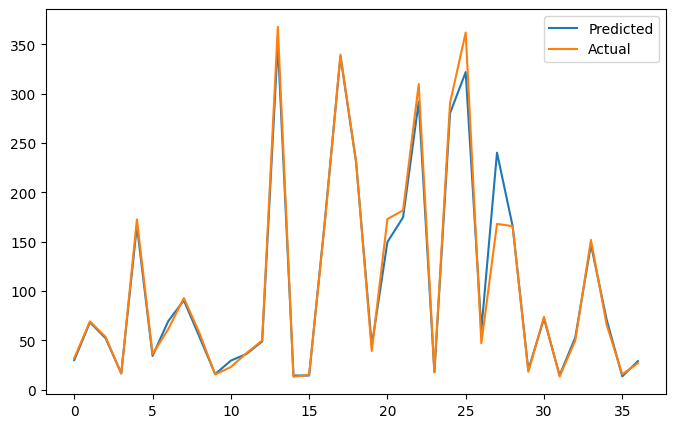

In [41]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'y_pred_lasso')

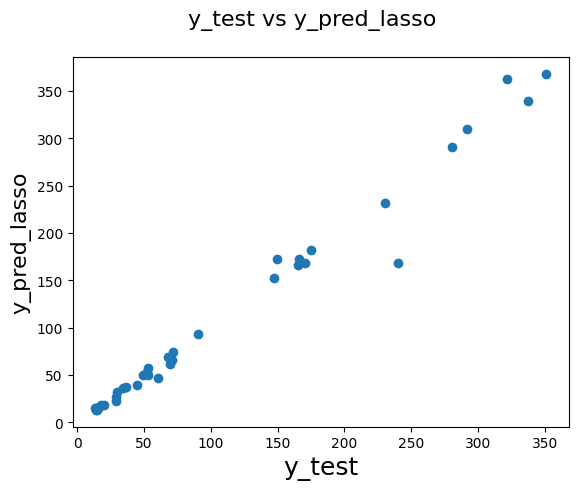

In [42]:
# Check for homoscadacity of lasso regression with cross validation

fig = plt.figure()
plt.scatter(y_pred_lasso, y_test)
fig.suptitle('y_test vs y_pred_lasso', fontsize = 16)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_lasso', fontsize = 16)

#Ridge cross validation

In [43]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)

# Fit the Algorithm
ridge_regressor.fit(X_train,y_train)

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

# Predict on the model
y_pred_ridge = ridge_regressor.predict(X_test)


The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -182.18095075905526


## Evaluation of **Mean squared value, Root mean squared value, R-square value and Mean absolute percentage error of Ridge cross validation**

In [44]:
# Here we evaluate the mse, rmse, r2, mapr of ridge cv model

# mean_squared_error
r_MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , r_MSE)

# Root mean_squared_error
r_RMSE = np.sqrt(r_MSE)
print("RMSE :" ,r_RMSE)

# R-square
r_r2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r_r2)

# Mean absolute percentage error
r_mapr = round(mean_absolute_percentage_error(y_test, y_pred_ridge),2)
print("mapr:", r_mapr)

MSE : 232.50877546732764
RMSE : 15.248238438171395
R2 : 0.9798661099034024
mapr: 0.08


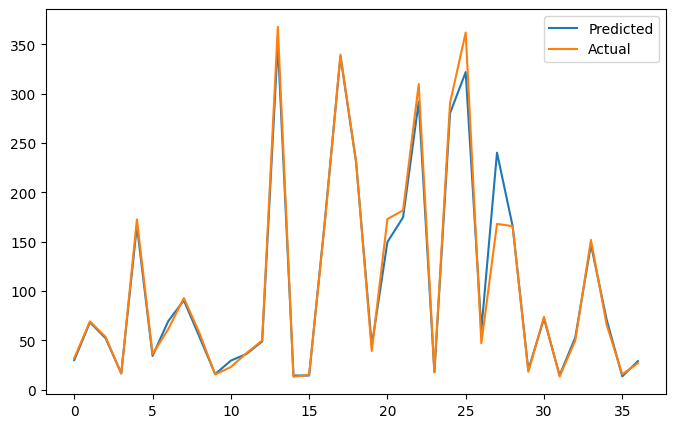

In [45]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_ridge))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'y_pred_ridge')

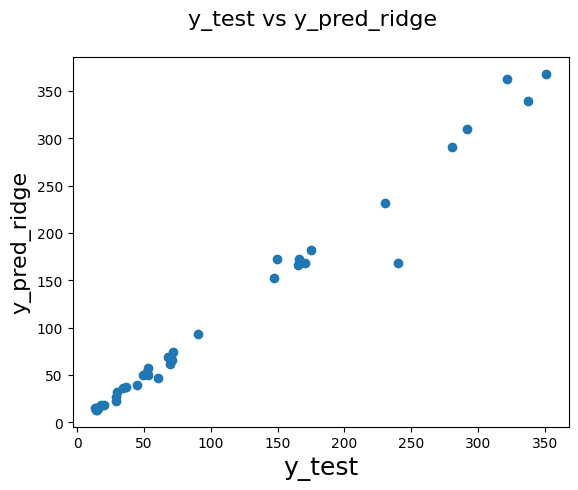

In [46]:
# Check for homoscadacity of ridge regression with cross validation

fig = plt.figure()
plt.scatter(y_pred_ridge, y_test)
fig.suptitle('y_test vs y_pred_ridge', fontsize = 16)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_ridge', fontsize = 16)

##### Which hyperparameter optimization technique have you used and why?

We used grid search coss validation technique in our model to make our model more predictable. With the use of grid search cross validation, the r2 value is 0.99- which explains 99% of the variance of the data.

# ML Model - 3- **Elastic net regression model**

In [47]:
# ML Model - 3 Implementation

elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Fit the Algorithm
elasticnet.fit(X_train,y_train)

# Predict on the model
y_pred_en = elasticnet.predict(X_test)


## Evaluation of **Mean squared value, Root mean squared value, R-square value and Mean absolute percentage error of Elastic net regression**

In [48]:
# Here we evaluate the mse, rmse, r2, mapr of elastic net model

# Mean_squared_error
MSE  = mean_squared_error((y_test), (y_pred_en))
print("MSE :" , MSE)

# Root mean_squared_error
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

# R- square
r2 = r2_score((y_test), (y_pred_en))
print("R2 :" ,r2)

# mean_absolute_percentage_error
mapr = round(mean_absolute_percentage_error(y_test, y_pred_en),2)
print("mapr:", mapr)

MSE : 2330.1674557227298
RMSE : 48.27180808425069
R2 : 0.7982212268509303
mapr: 0.86


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

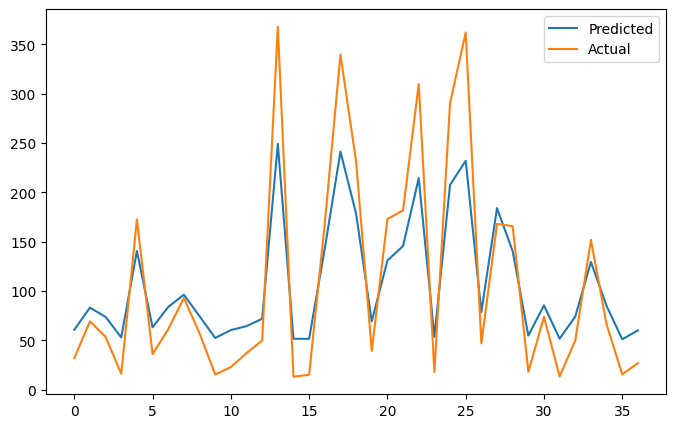

In [49]:
# Visualizing evaluation Metric Score chart

plt.figure(figsize=(8,5))
plt.plot((y_pred_en))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [50]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)

# Fit the Algorithm
elastic_regressor.fit(X_train, y_train)

# Predict on the model
y_pred_elastic = elastic_regressor.predict(X_test)


## Evaluation of **Mean squared value, Root mean squared value, R-square value and Mean absolute percentage error of Elastic net cross-validation**

In [51]:
# Here we evaluate the mse, rmse, r2, mapr of elastic net cv model

#  Mean_squared_error
e_MSE  = mean_squared_error((y_test),(y_pred_elastic))
print("MSE :" , e_MSE)

#  Root mean_squared_error
e_RMSE = np.sqrt(e_MSE)
print("RMSE :" ,e_RMSE)

# R- square
e_r2 = r2_score((y_test), (y_pred_elastic))
print("R2 :" ,e_r2)

# mean_absolute_percentage_error
e_mapr = mean_absolute_percentage_error(y_test, y_pred_elastic)
print("mapr:", e_mapr)

MSE : 232.5087754673296
RMSE : 15.24823843817146
R2 : 0.9798661099034023
mapr: 0.0767992184346706


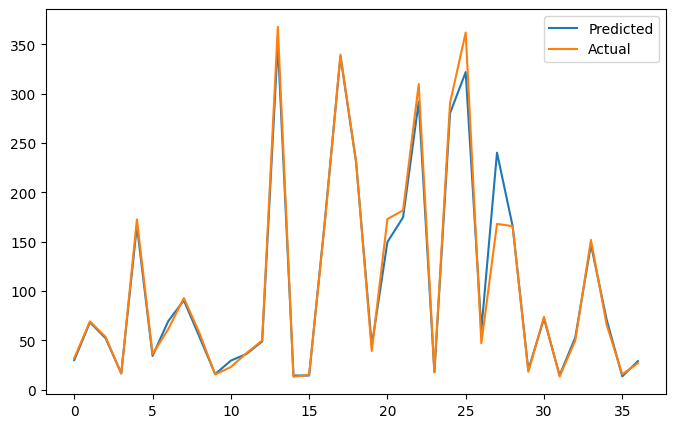

In [52]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_elastic))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'y_pred_elastic')

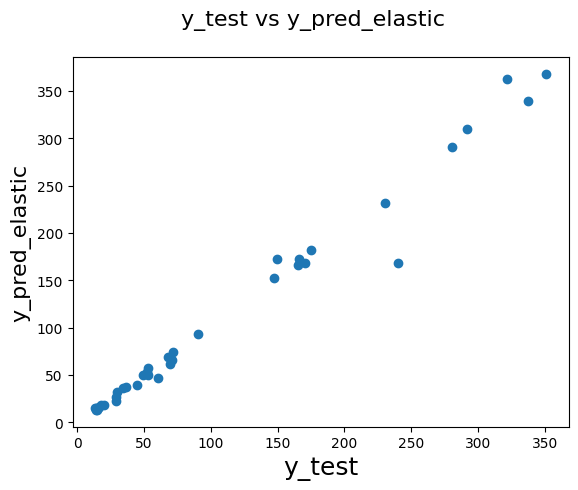

In [53]:
# Check for homoscadacity of elastic net regression with cross validation

fig = plt.figure()
plt.scatter(y_pred_elastic, y_test)
fig.suptitle('y_test vs y_pred_elastic', fontsize = 16)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_elastic', fontsize = 16)

## **Which hyperparameter optimization technique have you used and why?**

We used grid search coss validation technique in our model to make our model more predictable. As we can see in above results, without using CV, the r2 valiuue is 0.79. With the use of grid search cross validation, the r2 value is 0.978- which explains 97% of the variance of the data.

#Evaluation the test values and prediction values by all model

In [54]:
#Checking the test and predictive values
pd.DataFrame({'test':y_test,'linear_reg_pred':y_pred_test, 'lasso_reg_pred' : y_pred_lasso, 'Ridge_reg_pred': y_pred_ridge, 'elastic_reg_pred' : y_pred_elastic}).head(10)

,test,linear_reg_pred,lasso_reg_pred,Ridge_reg_pred,elastic_reg_pred
48,31.93,29.902344,29.902344,29.902344,29.902344
79,69.14,68.193957,68.193957,68.193957,68.193957
53,53.41,52.087246,52.087246,52.087246,52.087246
12,16.16,16.544118,16.544118,16.544118,16.544118
115,172.55,166.105029,166.105029,166.105029,166.105029
23,35.98,34.167914,34.167914,34.167914,34.167914
64,61.21,69.346547,69.346547,69.346547,69.346547
89,92.84,90.497073,90.497073,90.497073,90.497073
57,57.10,53.298943,53.298943,53.298943,53.298943
6,15.33,15.696915,15.696915,15.696915,15.696915


#Evaluation the MSE, RMSE, R2_score, MAPE of all model

In [55]:
Evaluation_report = pd.DataFrame(data={'model':['linear regression','ridge regression','lasso regression','elastic net regression'], 'MSE':[L_MSE,r_MSE,l_MSE,e_MSE],'RMSE':[L_RMSE,r_RMSE,l_RMSE,e_RMSE],'R2_score':[L_r2,r_r2,l_r2,e_r2],'MAPE':[L_mapr,r_mapr,l_mapr,e_mapr]})
Evaluation_report

,model,MSE,RMSE,R2_score,MAPE
0,linear regression,232.508775,15.248238,0.979866,0.076799
1,ridge regression,232.508775,15.248238,0.979866,0.080000
2,lasso regression,232.508775,15.248238,0.979866,0.080000
3,elastic net regression,232.508775,15.248238,0.979866,0.076799


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

All model have nearly same percentage error, but we can choose either ridge, lasso or elastic net regression. They all have nearly same percentage of error. We can choose these model over linear model because, linear regression might be a chance of over fitting but when we use cross validation on lasso, ridge and elastic net, the chnaces of over fitting will become less.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

###    We started with data information, data distribution, checked the corelation between each x- variable with y-variable.
###   we generate averaged features to remove correlation.
###First we built a simple linear regression model and was evaluated using mean squared error, root mean squared error, r2_score and mean absolute percentage error.
###   Additional features were engineered by taking lags and reduced the effect of multi collinearity using regularization techniques such as ridge, lasso and elastic net regression.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***